## Receiver Operating Characteristic (ROC) Curve and Precision / Recall (PR) curve

### Table of contents :
1. [Introduction](#1.-Introduction)
2. [Data preprocessing](#2.-Data-preprocessing)
3. [Model Training](#3.-Model-Training)
4. [What is ROC curve?](#4.-What-is-ROC-curve?)	
5. [What is PR curve?](#5.-What-is-PR-curve?)
6. [Summary](#6.-Summary)
7. [Reference](#7.-Reference)

## 1. Introduction 

Welcome!

In this tutorial, Let us understand the Receiving Operating Characteristic (ROC) curve, Precision-Recall (PR) curve and when to use each to interpret the prediction of probabilities for binary classification problems. ROC curve and PR curve provide answers to the questions - "How good is the classifier?", "Do we need both or specify only one of them?" and "When to use the ROC curve / PR curve?". For ease of understanding, we use `German UCI` dataset and generate the ROC curve and PR curve.

Before we go into a detailed explanation, here is a sneak peek into the steps involved in the process:


In [ ]:
# Preparation
!git clone https://github.com/sony/nnabla-examples.git
%cd nnabla-examples/responsible_ai/roc_pr_curve
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('images/overview.PNG')
cv2_imshow(img)

Let's import dependencies

In [1]:
import sys
import copy
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from utils import *
%matplotlib inline

## 2. Data preprocessing


Before training a model, we need to parse our datasets. Here, you may select between German and Adult UCI datasets, create `features` and `target` to store the data and the target value respectively.

In [2]:
dataset_name = "german"  # @param ["german", "adult"]

if dataset_name == "german":
    features, target = load_german_data()
else:
    features, target = load_adult_data()

features.head()

features sample 1000
features attributes 44
target samples 1000


,month,credit_amount,investment_as_income_percentage,residence_since,number_of_credits,people_liable_for,status_A12,status_A13,status_A14,credit_history_A31,...,property_A124,installment_plans_A142,installment_plans_A143,housing_A152,housing_A153,skill_level_A172,skill_level_A173,skill_level_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,2,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,1,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,1,2,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,1,2,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,2,2,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0


Let's split and standardize our dataset.

In [3]:
# split into train/test set
(X_train, X_test, Y_train, Y_test) = train_test_split(features, target, test_size=0.2, stratify=target, random_state=7)
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(X_train)
X_test = scale_orig.fit_transform(X_test)

## 3. Model Training

Now let's create a Logistic Regression classifier and train the model

In [4]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

After training the classifier, let us use the model to predict the target values for the test dataset. Predicted class labels from the model would be stored and used to plot ROC-AUC and PR scores.

In [5]:
base_predicted = model.predict_proba(X_test)[:,1]
base_accuracy = model.score(X_test, Y_test.ravel())

## 4. What is ROC Curve?

We could understand the information about False Positive Rate and True Positive Rate with ROC curve. Area under the ROC curve give is also a metric (AUC); the larger, the better.





$$True Positive Rate = \displaystyle\frac{\#\{\text{True Positives}\}}{\#\{\text{True Positives}\} + \#\{\text{False Negatives}\}}$$ <br>





$$False Positive Rate = \displaystyle\frac{\#\{\text{False Positives}\}}{\#\{\text{False Positives}\} + \#\{\text{True Negatives}\}}$$ <br>





Note that default ROC curve is intended for classification problem with two classes. When there are more than two classes, ROC curves must be plotted with respect to each class taking the rest of the combination of other classes as 'False class'.

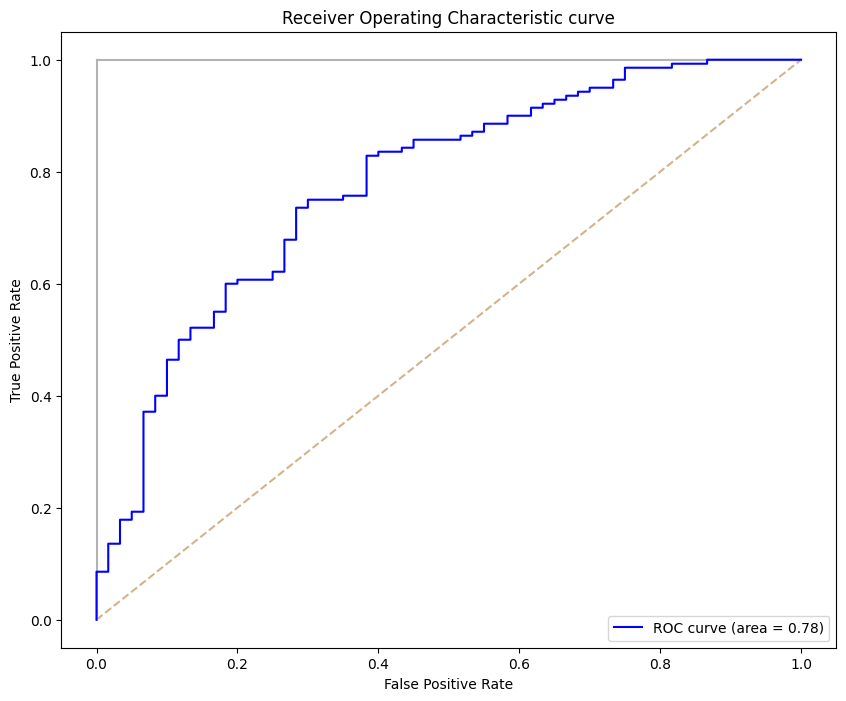

In [6]:
fpr, tpr = roc_curve_value(Y_test.values, base_predicted, np.arange(0, 1, 0.00001))
auc = auc_score(fpr, tpr)
get_roc_curve(fpr, tpr, auc)

ROC-AUC curve is plotted between the True positive rate and the false positive rate. True positive rate is put on the y-axis whereas the false positive rate is put on the x-axis.

## 5. What is PR Curve?

When trying classification models in machine learning, two metrics often used to assess the quality of the model are precision and recall. Precision-recal curve shows the tradeoff between precision and recalls for different thresholds in a given model. The area under the PR curve give is also a metric (AUC); higher the area, more desirable is the model.





**Precision:** Correct positive predictions relative to total positive predictions





$$Precision = \displaystyle\frac{\#\{\text{True Positives}\}}{\#\{\text{True Positives}\} + \#\{\text{False Positives}\}}$$ <br>





**Recall:** Correct positive predictions relative to total actual positives





$$Recall = \displaystyle\frac{\#\{\text{True Positives}\}}{\#\{\text{True Positives}\} + \#\{\text{False Negatives}\}}$$<br>

Next, let's calculate the precision and recall of the trained model and plot the precision-recall curve.

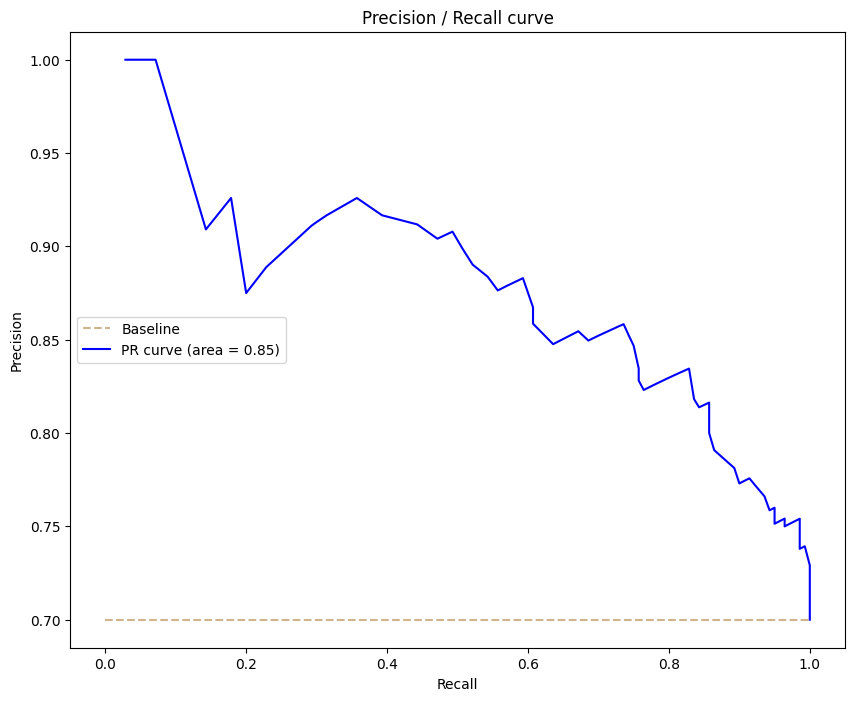

In [7]:
precision_scores, recall_scores = cal_scores(np.arange(0,1,0.01), base_predicted,Y_test.values)
auc = auc_score(recall_scores, precision_scores)
get_pr_curve(precision_scores, recall_scores, Y_test.values, auc)

The x-axis shows the Recall and the y-axis shows the Precision for various thresholds.

Notice that as recall increases, the precision decreases. This represents the tradeoff between the two metrics. On increasing the recall of the model, the precision decreases and vice versa.


**Both ROC-AUC & PR curves used for,**

* To explain model goodness and fit.
* To identify the correct threshold to map probability values to the actual class (0/1).


## 6. Summary
In this tutorial, we have shown the ROC and PR curves for structured data.

**When to use ROC / PR curve:**
1. When there is imbalance in class distribution in the dataset, use PR curve to explain the model goodness of fit and for threshold detection.
2. ROC-AUC curve is used when data set is balanced with respect to target class distribution.

## 7. Reference

[1] [Dua, Dheeru. and Graff, Casey. UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science(2019).
